# **Pizzs Sales Anylise Project - Eftakhar**

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. total sales
# 2. Identify which pizza is generating more sales.
# 3. identify which pizza is ordered the most
# 4. Identify which pizza category is hotselling.
# 5. identify the time at which we are getting high orders and the time at which we are getting the lowest orders
# 6. identify which day of the week we are getting the most orders.
# 7. Identify at which time of the day, people are ordering more pizzas.       (morning/evening/afternoon/night)

# Load CSV files into dataframes
order_details = pd.read_csv('order_details.csv')
orders = pd.read_csv('orders.csv')
pizza_types = pd.read_csv('pizza_types.csv',encoding='unicode_escape')
pizzas = pd.read_csv('pizzas.csv')

# Convert 'date' and 'time' columns to datetime
orders["date"] = pd.to_datetime(orders["date"])
orders["time"] = pd.to_datetime(orders["time"])


C:\Users\DELL\AppData\Local\Temp\ipykernel_1620\2590600997.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  orders["time"] = pd.to_datetime(orders["time"])


# Total Sales

In [66]:
pizza_detail = pd.merge(left = pizzas, right = order_details, on = "pizza_id", how="inner")

pizza_detail["Sales"] = (pizza_detail["price"]*pizza_detail["quantity"])
print("#"*37)
print("Total Sales Of Pizzas is $",pizza_detail["Sales"].sum())
print("#"*37)

#####################################
Total Sales Of Pizzas is $ 817860.05
#####################################


# Pizza Generating More Sales

In [67]:
pizza_order_detail = pd.merge(left = pizza_types, right = pizza_detail, on = "pizza_type_id", how = "inner")

# Remove ingredients coloums 
pizza_order_detail = pizza_order_detail.drop("ingredients",axis=1)

# GroupBy 
gb_name = pizza_order_detail.groupby("name").agg({"quantity":"sum"})

# Using Maximimum Function 
max_sales=gb_name.idxmax()
max_sales_value = max_sales.values[0]


print("#"*50)

print(max_sales_value,"Is The Most Sales Pizza's")

print("#"*50)


##################################################
The Classic Deluxe Pizza Is The Most Sales Pizza's
##################################################


# Pizza Ordered The Most

In [68]:
# GroupBy 
gb_name_qty = pizza_order_detail.groupby("name").agg({"Sales":"sum"})

# Using Maximimum Function 
max_sales_qty=gb_name_qty.idxmax()

#Removing Values in out puts Like column names and data type
max_sales_value_qty = max_sales_qty.values[0]

print("#"*50)

print(max_sales_value_qty,"Is The Most Ordered Pizza's")

print("#"*50)

##################################################
The Thai Chicken Pizza Is The Most Ordered Pizza's
##################################################


# Hotselling Pizza Category

####################################
Hotselling Pizza Category Is Classic
####################################


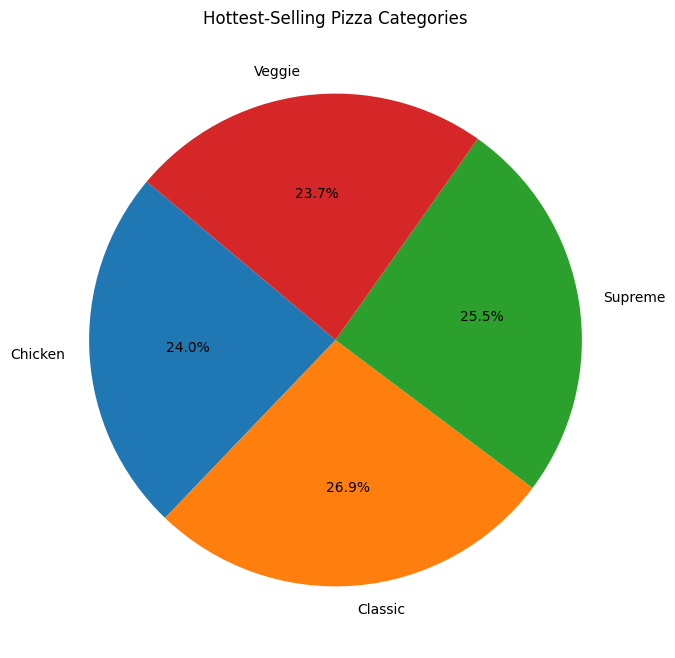

In [69]:
# GroupBy
gb_hotsell = pizza_order_detail.groupby("category").agg({"Sales":"sum"})

# Using Maximum Function
max_hotsell = gb_hotsell.idxmax()

# Removing Values From Output
max_hotsell_val = max_hotsell.values[0]

print("#"*36)
print("Hotselling Pizza Category Is",max_hotsell_val)
print("#"*36)
# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(gb_hotsell["Sales"], labels=gb_hotsell.index, autopct='%1.1f%%', startangle=140)
plt.title('Hottest-Selling Pizza Categories')
plt.show()



# Day Of The Week Getting The Most Orders

******************************
On Friday Get The Most Order
******************************


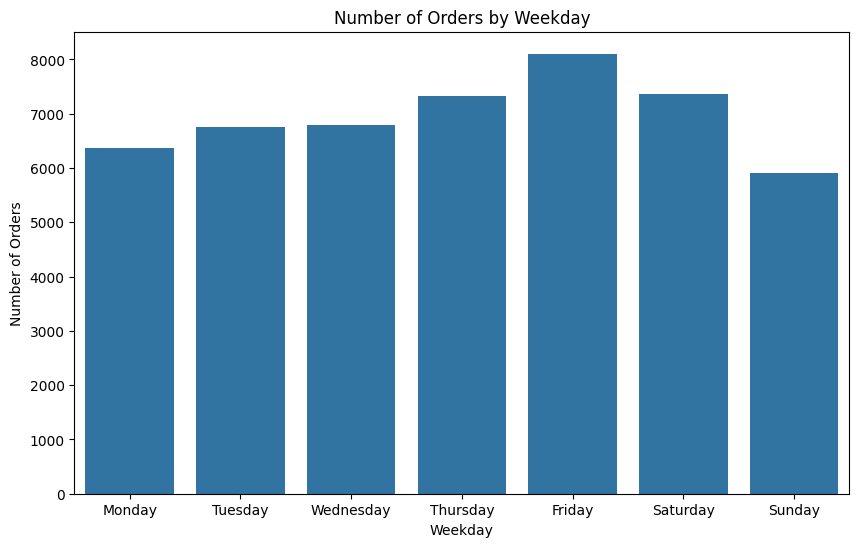

In [70]:
# Mearg Order_detail And order
order_comp=pd.merge(left = order_details, right = orders, on = "order_id", how = "inner")

# extract name of week days from date
order_comp["weekdays"] = order_comp["date"].dt.strftime("%A")

# Groupby 
weekdays_most = order_comp.groupby("weekdays").agg({"order_details_id":"count"})

# Using Max function
max_weekdays = weekdays_most.idxmax()

# Removing Values From max output
max_weekdays_val = max_weekdays.values[0]

print("*"*30)
print("On",max_weekdays_val, "Get The Most Order")
print("*"*30)

# Reorder the weekdays for better visualization
weekdays_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdays_most = weekdays_most.reindex(weekdays_order)

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=weekdays_most.index, y="order_details_id", data=weekdays_most)
plt.title('Number of Orders by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of Orders')
plt.show()

# Ordering More Pizzas In Which Part Of Day

********************************
In Afternoon Get The Most Order
********************************


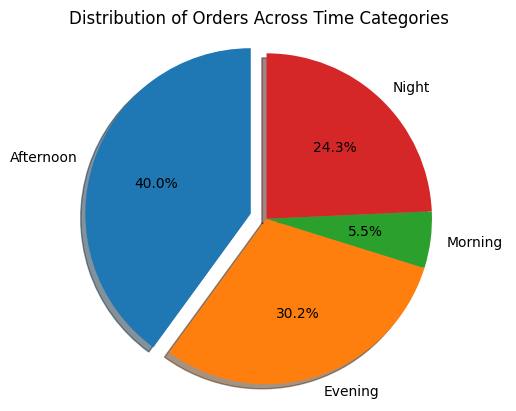

In [71]:
# Define function to categorize hours into time periods
def categorize_time(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 16:
        return 'Afternoon'
    elif 16 <= hour < 19:
        return 'Evening'
    else:
        return 'Night'

# Create a new column 'time_category' based on the hour using apply
orders['time_category'] = orders['time'].dt.hour.apply(categorize_time)

# merging orders and order_details
comp_order_details=pd.merge(left = order_details, right = orders, on = "order_id", how="inner")

# groupby time category
more_piza = comp_order_details.groupby("time_category").agg({"order_details_id":"count"})

# Using Max function
max_more_piza = more_piza.idxmax()

# Removing Values From max output
max_more_piza = max_more_piza.values[0]

print("*"*32)
print("In",max_more_piza, "Get The Most Order")
print("*"*32)

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = more_piza.index
sizes = more_piza['order_details_id']
explode = (0.1, 0, 0, 0)  # only "explode" the 1st slice (i.e., 'Morning')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Distribution of Orders Across Time Categories')
plt.show()

# Getting Higest And Lowest Order Time

********************************
Time with the Highest Orders: Afternoon
Time with the Lowest Orders: Morning
********************************


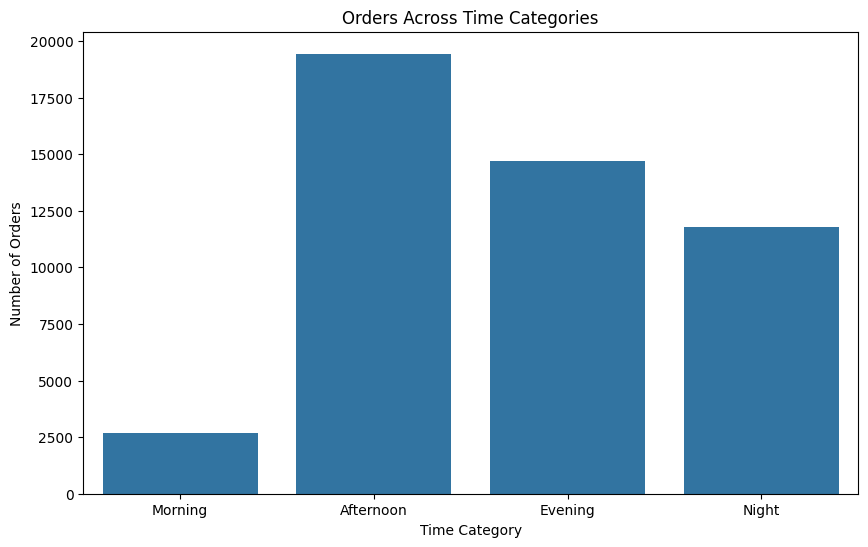

In [72]:
# Group by time category and count the number of orders
order_counts = comp_order_details.groupby("time_category").agg({"order_details_id": "count"}).reset_index()

# Identify the time with the highest and lowest orders
max_orders_time = order_counts.loc[order_counts['order_details_id'].idxmax(), 'time_category']
min_orders_time = order_counts.loc[order_counts['order_details_id'].idxmin(), 'time_category']

print("*" * 32)
print("Time with the Highest Orders:", max_orders_time)
print("Time with the Lowest Orders:", min_orders_time)
print("*" * 32)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='time_category', y='order_details_id', data=order_counts, order=['Morning', 'Afternoon', 'Evening', 'Night'])
plt.title('Orders Across Time Categories')
plt.xlabel('Time Category')
plt.ylabel('Number of Orders')
plt.show()